In [1]:
import pandas as pd
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    auc,
)
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import cohen_kappa_score

In [2]:
# Load your dataset
data = pd.read_csv("C:/Users/DELL/Documents/myNewDataSet/ProcessedData.csv")

In [3]:
# Separate features and target
X = data.drop(columns=["Perinatal_Death"])
y = data["Perinatal_Death"]

In [4]:
# Initialize SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)


In [5]:
# Apply SMOTE to your dataset
X_resampled, y_resampled = smote.fit_resample(X, y)

In [6]:
# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [7]:
# Initialize and fit the Support Vector Machine (SVM) model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [8]:
# Predict the target values on the test set
y_pred = svm_model.predict(X_train)

In [9]:
# Check the unique labels in y_test
unique_labels = set(y_train)
print("Unique Labels in y_train:", unique_labels)

Unique Labels in y_train: {10, 20}


In [10]:
# Calculate various metrics
accuracy = accuracy_score(y_train, y_pred)
precision = precision_score(y_train, y_pred, pos_label=20)
recall = recall_score(y_train, y_pred, pos_label=20)
f1 = f1_score(y_train, y_pred, pos_label=20)
roc_auc = roc_auc_score(y_train, y_pred)
kappa = cohen_kappa_score(y_train, y_pred)

Confusion Matrix (Actual vs. Predicted):
                  Predicted Positive  Predicted Negative
Actual Positive                2930                 196
Actual Negative                  79                3029


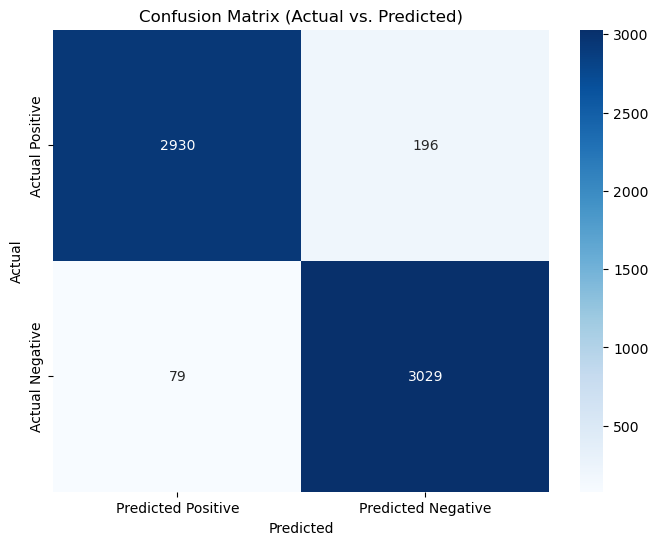

In [12]:
import seaborn as sns
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_train, y_pred)

# Create a labeled confusion matrix
confusion_matrix_train = pd.DataFrame(conf_matrix, columns=[ "Predicted Positive","Predicted Negative"], index=["Actual Positive","Actual Negative"])

# Display the labeled confusion matrix
print("Confusion Matrix (Actual vs. Predicted):\n", confusion_matrix_train)

# Plot a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_train, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Actual vs. Predicted)")

# Save the plot as a svg file
plt.savefig("C:/Users/DELL/Documents/myNewDataSet/My Models/Figures/SVM/confusion matrix train data.svg", format='svg')


plt.show()


In [13]:
# Classification Report
class_report = classification_report(y_train, y_pred)

In [17]:
# Given confusion matrix values
TP = 2930
FN = 196
FP = 79
TN = 3029

# Calculate Sensitivity (True Positive Rate)
sensitivity = TP / (TP + FN)

# Calculate Specificity (True Negative Rate)
specificity = TN / (TN + FP)

In [18]:
# Print all the calculated metrics
print(f"Sensitivity (True Positive Rate): {sensitivity:.3f}")
print(f"Specificity (True Negative Rate): {specificity:.3f}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC: {roc_auc}")
print(f"Kappa Statistics: {kappa}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

Sensitivity (True Positive Rate): 0.937
Specificity (True Negative Rate): 0.975
Accuracy: 0.9558870709015078
Precision: 0.9392248062015504
Recall: 0.9745817245817245
F1 Score: 0.9565766619295752
ROC AUC: 0.9559408942806256
Kappa Statistics: 0.9117829674205985
Confusion Matrix:
[[2930  196]
 [  79 3029]]
Classification Report:
              precision    recall  f1-score   support

          10       0.97      0.94      0.96      3126
          20       0.94      0.97      0.96      3108

    accuracy                           0.96      6234
   macro avg       0.96      0.96      0.96      6234
weighted avg       0.96      0.96      0.96      6234



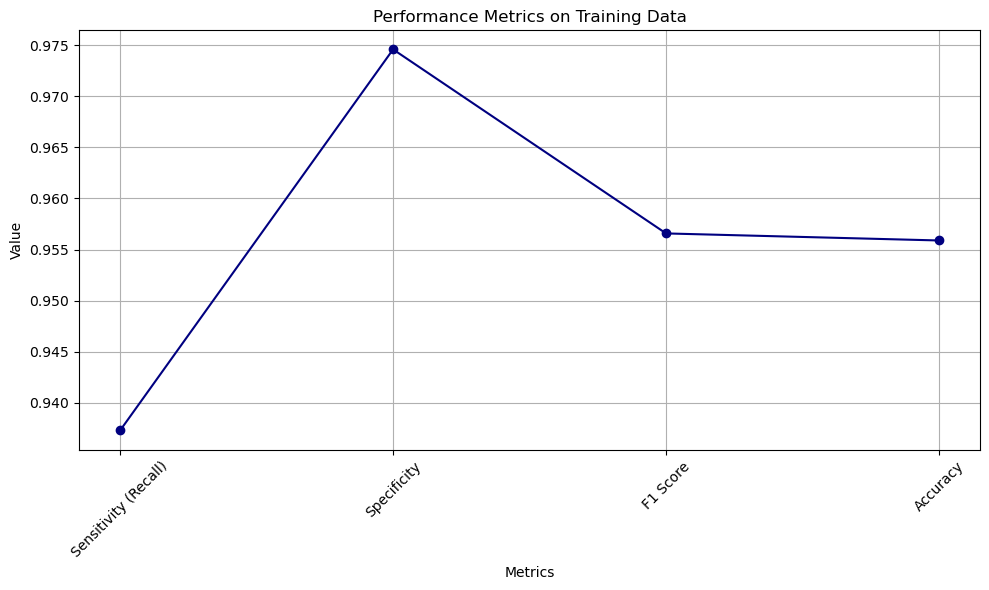

In [21]:
# Create an array of metric values
metrics = [sensitivity , specificity, f1, accuracy]

# Create labels for the metrics
labels = ['Sensitivity (Recall)', 'Specificity', 'F1 Score', 'Accuracy']

# Create a line chart
plt.figure(figsize=(10, 6))
plt.plot(labels, metrics, marker='o', linestyle='-', color='#000080')
plt.title('Performance Metrics on Training Data')
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.grid(True)

# Display the chart
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()